# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

#%load_ext pycodestyle_magic

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [278]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.distance = self.__calc_metric

    def __calc_metric(self, X, Y):
        if self.metric == 'euclidean':
            return np.sqrt(((X - Y) ** 2).sum(axis=1))

    def k_means(self, X):
        self.centroids = np.empty((self.k, X.shape[1]))
        self.centroids[0] = X[np.random.choice(X.shape[0])]
        dist = np.empty((self.k, X.shape[0]))
        for i in range(1, self.k):
            for j in range(self.k):
                dist[j] = self.distance(X, self.centroids[i, :])
            distances = np.min(dist, axis=0)
            rands = np.random.uniform(0, 1) * distances.sum()
            self.centroids[i-1] = X[np.cumsum(distances) > rands][0]

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров

        ## Your Code Here

        if self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0], self.k)]
        if self.init == 'k-means':
            self.k_means(X)

        centroids = np.empty((self.k, X.shape[1]))
        distances = np.empty((self.k, X.shape[0]))
        for i in range(self.max_iter):
            for j in range(self.k):
                distances[j, :] = self.distance(X, self.centroids[j, :])
            self.labels = np.argmin(distances, axis=0)
            for k in range(self.k):
                m = X[self.labels == k, :]
                centroids[k] = np.sum(m, axis=0) / m.shape[0]
            if np.array_equal(centroids, self.centroids):
                break
            self.centroids = centroids

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        dist = np.empty((self.k, X.shape[0]))
        for i in range(self.k):
            dist[i, :] = self.distance(X, self.centroids[i, :])
        return np.argmin(dist, axis=0)


class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                random_state=None, init='random', batch_size=10):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        #self.centroids = np.empty((self.k, X.shape[1]))

        if self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0], self.k)]
        if self.init == 'k-means':
            self.k_means(X)

        centroids = np.empty((self.k, X.shape[1]))
        distances = np.empty((self.k, X.shape[0]))
        for i in range(self.max_iter):
            split = np.random.choice(np.arange(X.shape[0]), self.batch_size)
            distances = np.empty((self.k, X[split].shape[0]))
            for j in range(self.k):
                distances[j, :] = self.distance(X[split], self.centroids[j, :])
            self.labels[split] = np.argmin(distances, axis=0)
            for k in range(self.k):
                m = X[split][self.labels[split] == k, :]
                centroids[k] = np.sum(m, axis=0) / m.shape[0]
            if np.array_equal(centroids, self.centroids):
                break
            self.centroids = centroids
        distances = np.empty((self.k, X.shape[0]))
        for i in range(self.k):
            distances[i, :] = self.distance(X, self.centroids[i, :])
        self.labels = np.argmin(distances, axis=0)

        return self


### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [242]:
from sklearn.datasets import make_blobs

In [291]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

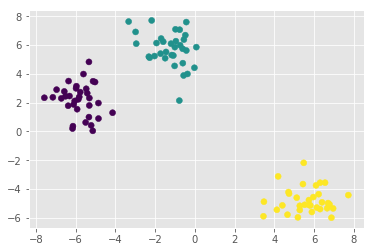

In [217]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

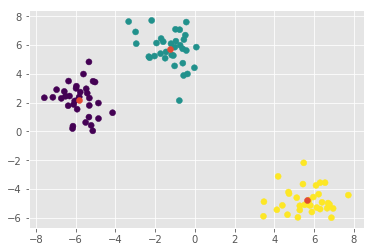

In [218]:
## Работоспособность MyKmeans
clf = MyKmeans(k=3)
clf.fit(X)
y_pred = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

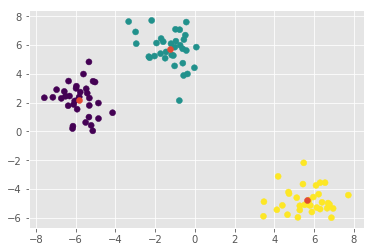

In [223]:
## Работоспособность MyKmeans++
clf = MyKmeans(k=3, init='k-means')
clf.fit(X)
y_pred = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

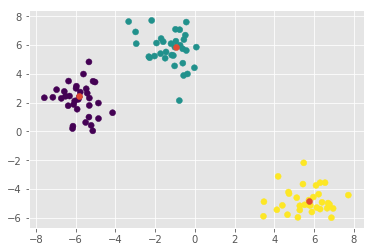

In [253]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3, batch_size=20)
clf.fit(X)

y_pred = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

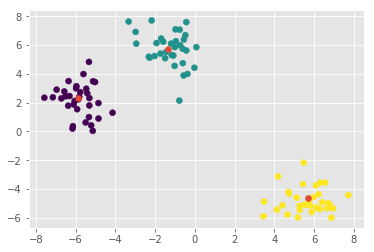

In [303]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3, batch_size=20)
clf.fit(X)
#y_pred = clf.labels
y_pred = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

In [304]:
import time
from sklearn.cluster import KMeans

In [305]:
X, y = make_blobs(n_samples=100000, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

In [257]:
## Время выполнения алгоритма Kmeans из sklearn
clf = KMeans(n_clusters=3)

In [258]:
%time clf.fit(X)

Wall time: 507 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [259]:
## Время выполнения алгоритма MyKmeans
clf = MyKmeans(k=3)

In [260]:
%time clf.fit(X)

Wall time: 61 ms


In [261]:
## Время выполнения алгоритма MyKmeans++
clf = MyKmeans(k=3, init='k-means')

In [262]:
%time clf.fit(X)

Wall time: 104 ms


In [263]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3, batch_size=100)

In [264]:
%time clf.fit(X)

Wall time: 41 ms


In [265]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3, batch_size=100, init='k-means')

In [266]:
%time clf.fit(X)

Wall time: 75.1 ms


In [267]:
import time

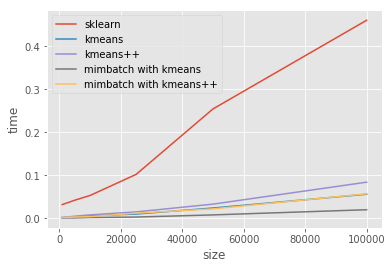

In [269]:
sizes = [1000, 5000, 10000, 25000, 50000, 100000]
t = []
times = []
clfs = [KMeans(n_clusters=3), MyKmeans(k=3), MyKmeans(k=3, init='k-means')
          , MiniBatchKMeans(k=3, batch_size=100), MiniBatchKMeans(k=3, batch_size=100, init='k-means')]
for j, clf in enumerate(clfs):
    t.clear()
    for i, size in enumerate(sizes):
        X, y = make_blobs(n_samples=size, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
        start = time.time()
        clf.fit(X)
        end = time.time() - start
        t.append(end)
    times.append(t.copy())
plt.plot(sizes, times[0], label='sklearn')
plt.plot(sizes, times[1], label='kmeans')
plt.plot(sizes, times[2], label='kmeans++')
plt.plot(sizes, times[3], label='mimbatch with kmeans')
plt.plot(sizes, times[4], label='mimbatch with kmeans++')
plt.legend()
plt.xlabel('size')
plt.ylabel('time')
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [270]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [271]:
#оставляем 36 ключевых слов
df_sns = df_sns.drop(columns=['gradyear', 'gender', 'age', 'friends'])

In [272]:
#вычитаем среднее и делим на std
X = df_sns
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [273]:
k = 9
batch_size = 1000

In [274]:
%%time
## MyKMeans
clf = MyKmeans(k=k)
clf.fit(X.values)
y_pred = clf.predict(X.values)

for i, centr in enumerate(clf.centroids):
    print(i+1, 'claster', 'size', clf.labels[clf.labels == i].size)
    print(X.columns[np.argsort(centr)][:])

1 claster size 421
Index(['jesus', 'volleyball', 'soccer', 'bible', 'church', 'abercrombie',
       'cheerleading', 'tennis', 'softball', 'swimming', 'hollister', 'hot',
       'mall', 'shopping', 'baseball', 'marching', 'god', 'basketball',
       'dress', 'football', 'cute', 'blonde', 'death', 'sexy', 'clothes',
       'dance', 'sports', 'drugs', 'band', 'die', 'drunk', 'rock', 'hair',
       'kissed', 'music', 'sex'],
      dtype='object')
2 claster size 338
Index(['marching', 'jesus', 'band', 'church', 'bible', 'baseball', 'softball',
       'soccer', 'death', 'blonde', 'god', 'drunk', 'sex', 'sexy', 'rock',
       'die', 'dance', 'music', 'drugs', 'sports', 'basketball', 'dress',
       'tennis', 'football', 'kissed', 'swimming', 'volleyball', 'hot', 'cute',
       'cheerleading', 'mall', 'clothes', 'hair', 'shopping', 'hollister',
       'abercrombie'],
      dtype='object')
3 claster size 3983
Index(['sports', 'soccer', 'drugs', 'marching', 'band', 'kissed', 'sex',
       'baseb

In [286]:
%%time
## MyKMeans++
clf = MyKmeans(k=k, init='k-means')
clf.fit(X.values)
y_pred = clf.predict(X.values)

for i, centr in enumerate(clf.centroids):
    print(i+1, 'claster', 'size', clf.labels[clf.labels == i].size)
    print(X.columns[np.argsort(centr)][:])

1 claster size 4363
Index(['die', 'sexy', 'bible', 'baseball', 'hot', 'kissed', 'sex', 'church',
       'drugs', 'drunk', 'jesus', 'blonde', 'basketball', 'god', 'sports',
       'soccer', 'hair', 'softball', 'volleyball', 'cheerleading', 'tennis',
       'death', 'abercrombie', 'football', 'hollister', 'cute', 'clothes',
       'mall', 'swimming', 'dress', 'rock', 'marching', 'shopping', 'band',
       'dance', 'music'],
      dtype='object')
2 claster size 627
Index(['bible', 'dress', 'marching', 'death', 'band', 'die', 'hot', 'jesus',
       'god', 'drunk', 'sexy', 'hollister', 'dance', 'abercrombie', 'shopping',
       'tennis', 'drugs', 'music', 'blonde', 'church', 'kissed', 'swimming',
       'sex', 'cute', 'clothes', 'mall', 'cheerleading', 'soccer', 'hair',
       'volleyball', 'softball', 'rock', 'sports', 'football', 'basketball',
       'baseball'],
      dtype='object')
3 claster size 19677
Index(['music', 'die', 'dance', 'hair', 'rock', 'clothes', 'shopping',
       'kisse

In [281]:
%%time
## MyKMeans с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=k, batch_size=batch_size)
clf.fit(X.values)
y_pred = clf.predict(X.values)

for i, centr in enumerate(clf.centroids):
    print(i+1, 'claster', 'size', clf.labels[clf.labels == i].size)
    print(X.columns[np.argsort(centr)][:])

1 claster size 1895
Index(['tennis', 'soccer', 'drugs', 'sports', 'marching', 'hair', 'football',
       'bible', 'blonde', 'kissed', 'swimming', 'abercrombie', 'rock', 'sex',
       'death', 'drunk', 'basketball', 'baseball', 'music', 'die', 'sexy',
       'cheerleading', 'mall', 'volleyball', 'band', 'softball', 'clothes',
       'god', 'hollister', 'dress', 'dance', 'shopping', 'jesus', 'cute',
       'hot', 'church'],
      dtype='object')
2 claster size 3062
Index(['football', 'clothes', 'hair', 'shopping', 'cheerleading', 'cute',
       'swimming', 'kissed', 'drunk', 'church', 'tennis', 'hot', 'sexy', 'god',
       'mall', 'dance', 'abercrombie', 'music', 'jesus', 'die', 'sex',
       'hollister', 'drugs', 'band', 'bible', 'blonde', 'baseball', 'death',
       'dress', 'basketball', 'sports', 'marching', 'volleyball', 'softball',
       'soccer', 'rock'],
      dtype='object')
3 claster size 476
Index(['softball', 'clothes', 'sex', 'marching', 'dress', 'god', 'drunk',
       'hai

In [288]:
%%time
## MyKMeans++ с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=k, batch_size=batch_size, init='k-means')
clf.fit(X.values)
y_pred = clf.predict(X.values)

for i, centr in enumerate(clf.centroids):
    print(i+1, 'claster', 'size', clf.labels[clf.labels == i].size)
    print(X.columns[np.argsort(centr)][:])

1 claster size 370
Index(['rock', 'band', 'dress', 'music', 'volleyball', 'cheerleading',
       'hollister', 'sex', 'abercrombie', 'dance', 'tennis', 'marching',
       'soccer', 'clothes', 'softball', 'sexy', 'mall', 'die', 'blonde', 'god',
       'shopping', 'drugs', 'kissed', 'death', 'drunk', 'cute', 'hot', 'bible',
       'church', 'hair', 'swimming', 'basketball', 'jesus', 'sports',
       'football', 'baseball'],
      dtype='object')
2 claster size 1372
Index(['dress', 'jesus', 'hot', 'hollister', 'dance', 'softball', 'drugs',
       'abercrombie', 'cute', 'church', 'marching', 'mall', 'volleyball',
       'cheerleading', 'bible', 'clothes', 'basketball', 'death', 'shopping',
       'soccer', 'god', 'blonde', 'sexy', 'drunk', 'football', 'tennis',
       'hair', 'baseball', 'band', 'kissed', 'die', 'sex', 'swimming', 'music',
       'sports', 'rock'],
      dtype='object')
3 claster size 518
Index(['football', 'church', 'hair', 'dance', 'cute', 'band', 'drunk',
       'shoppin

In [289]:
## Вывод
# При проверке на простых данных все методы показали более менее одинаковую точность. Самым долгим по времени, очевидно,
# оказался kmeans++, однако значительно лучших результатов он не показал.
#
# На sns датасете kmeans++ значительно дольше работает, поэтому на больших данных, на мой взгляд предпочтительнее использовать 
# kmeans с MiniBatch т.к. ощутимой потери точности не наблюдается.
#
# Таким образом, предпочтение отдается алгоритму MiniBatch, однако на маленьких датасетах лучше использовать kmeans++.